In [38]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combinedData = pd.merge(cityData, rideData, how='outer', on="city")

# Display the data table for preview
combinedData.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

Note: Circle size correlates with driver count per city.


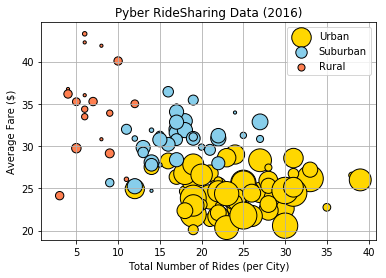

In [78]:
# Obtain the x and y coordinates for each of the three city types
#checking the unique type values
combinedData["type"].unique()

# x = rideIDs per city. Sum Number of rideIDs for each city in a type.

cityGroup = combinedData.groupby('city')
rides_by_city_df = cityGroup.apply(pd.DataFrame)

# Making a list for each x. Counting up the rideIDs.
# Making a list for each y. Averaging the fares.
# S = circle size. Correlates with driver count per city.

urban_getter = rides_by_city_df.loc[rides_by_city_df['type'] == 'Urban'].groupby('city')
urbanX = urban_getter["ride_id"].count()
urbanY = urban_getter["fare"].mean()
urbanS = urban_getter["driver_count"].mean()

#print(urbanX, urbanY)

suburban_getter = rides_by_city_df.loc[rides_by_city_df['type'] == 'Suburban'].groupby('city')
suburbanX = suburban_getter["ride_id"].count()
suburbanY = suburban_getter["fare"].mean()
suburbanS = suburban_getter["driver_count"].mean()

rural_getter = rides_by_city_df.loc[rides_by_city_df['type'] == 'Rural'].groupby('city')
ruralX = rural_getter["ride_id"].count()
ruralY = rural_getter["fare"].mean()
ruralS = rural_getter["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urbanX, urbanY, urbanS*10, c = "gold", edgecolors = "black")
plt.scatter(suburbanX, suburbanY, suburbanS*10, c = "skyblue", edgecolors = "black")
plt.scatter(ruralX, ruralY, ruralS*10, c = "coral", edgecolors = "black")

# Incorporate the other graph properties
plt.grid(b=None, which='major', axis='both')
plt.title("Pyber RideSharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(["Urban", "Suburban", "Rural"])

# Incorporate a text label regarding circle size
print("Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("scatterplot_MG")

## Total Fares by City Type

In [79]:
# Calculate Type Percents

# Sum of fares by City type
urban_fares = urban_getter["fare"].sum()

totalurbanfares = 0
for fare in urban_fares:
    totalurbanfares += fare 

suburban_fares = suburban_getter["fare"].sum()

totalsuburbanfares = 0
for fare in suburban_fares:
    totalsuburbanfares += fare 

rural_fares = rural_getter["fare"].sum()

totalruralfares = 0
for fare in rural_fares:
    totalruralfares += fare 

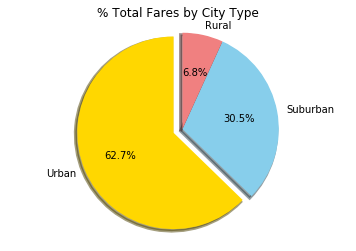

<Figure size 432x288 with 0 Axes>

In [80]:
# Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "skyblue", "lightcoral"]
explode = [0.1, 0, 0]

fares_list = [totalurbanfares, totalsuburbanfares, totalruralfares]

plt.title("% Total Fares by City Type")

plt.pie(fares_list, labels=labels, colors=colors,explode = explode,
        autopct="%1.1f%%", shadow = True, startangle = 90, wedgeprops={'linewidth': 3})
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("fares_city_type_pie_MG")

## Total Rides by City Type

In [55]:
# Calculate Ride Percents

# Sum of fares by City type

urban_rides = urban_getter["ride_id"].count()
totalurbanrides = 0
for ride in urban_rides:
    totalurbanrides += ride 

suburban_rides = suburban_getter["ride_id"].count()
totalsuburbanrides = 0
for ride in suburban_rides:
    totalsuburbanrides += ride 


rural_rides = rural_getter["ride_id"].count()
totalruralrides = 0
for ride in rural_rides:
    totalruralrides += ride 

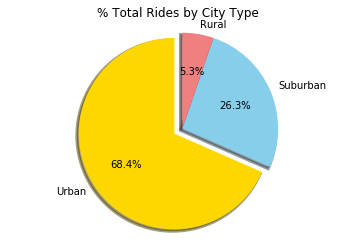

<Figure size 432x288 with 0 Axes>

In [74]:
rides_list = [totalurbanrides, totalsuburbanrides, totalruralrides]


# Build Pie Chart

plt.title("% Total Rides by City Type")
plt.pie(rides_list, labels=labels, colors=colors,explode = explode,
        autopct="%1.1f%%", shadow = True, startangle = 90, wedgeprops={'linewidth': 3})
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("rides_city_type_pie_MG")

## Total Drivers by City Type

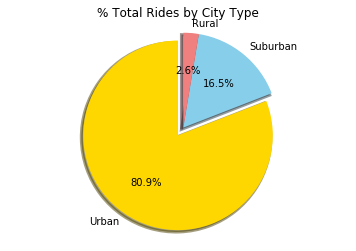

<Figure size 432x288 with 0 Axes>

In [75]:
# Calculate Driver Percents

urban_drivers =int(urban_getter["driver_count"].unique().sum())

suburban_drivers =int(suburban_getter["driver_count"].unique().sum())

rural_drivers =int(rural_getter["driver_count"].unique().sum())

# Build Pie Charts
drivers_list = [urban_drivers, suburban_drivers, rural_drivers]
drivers_list

plt.title("% Total Rides by City Type")
plt.pie(drivers_list, labels=labels, colors=colors,explode = explode,
        autopct="%1.1f%%", shadow = True, startangle = 90, wedgeprops={'linewidth': 3})
plt.axis("equal")
plt.show()

# Save Figure

plt.savefig("drivers_city_type_pie_MG")
